<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [5]:
# TODO:
# 3. prepare DataLoader for temperature variable

Goal: to load ERA5 data, currently in netCDF (.nc) format, into a PyTorch DataLoader. 

In [6]:
import os
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from scipy.stats import skew, kurtosis
from statsmodels.tsa.seasonal import STL
from datetime import datetime

In [7]:
nc1 = nc.Dataset("/home/lucia/projects/FORMES/rainfall-pde-ml/data/ERA5/file1.nc")
nc2 = nc.Dataset("/home/lucia/projects/FORMES/rainfall-pde-ml/data/ERA5/file2.nc")

In [8]:
precip_arr = np.load("/home/lucia/projects/FORMES/rainfall-pde-ml/data/era5_npy/tp_6h_2000-01-01_2023-09-07_filled.npy")
temp_arr = np.load("/home/lucia/projects/FORMES/rainfall-pde-ml/data/era5_npy/t2m_6h_2000-01-01_2023-09-07_filled.npy")

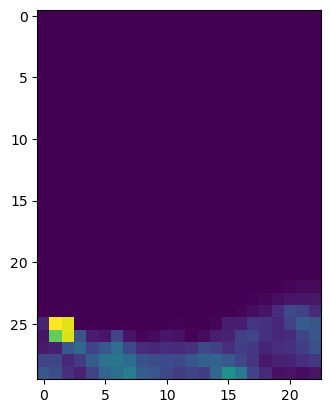

In [9]:
plt.imshow(nc1.variables["tp"][:][0, :, :])

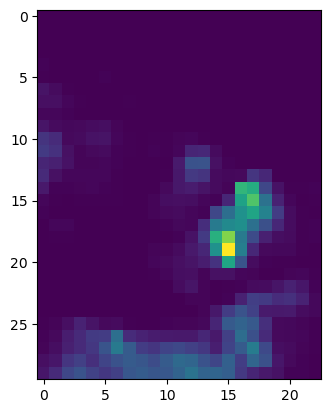

In [31]:
plt.imshow(precip_arr[4])

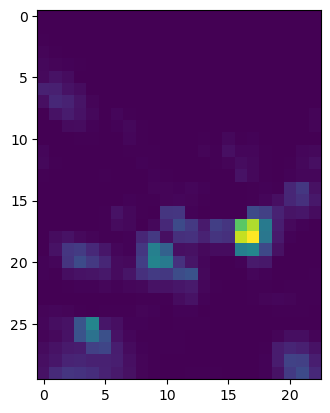

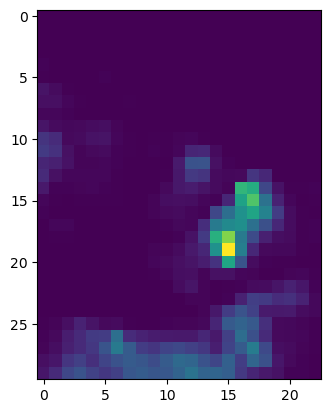

In [30]:
path = "/home/lucia/projects/FORMES/rainfall-pde-ml/data/era5_daily_npy/"
precip_files = os.listdir(path + "precipitation/")
precip_files.sort()

precip0 = np.load(path + "precipitation/" + precip_files[0])
precip1 = np.load(path + "precipitation/" + precip_files[1])

plt.imshow(precip0[3])
plt.show()
plt.imshow(precip1[0])

In [21]:
# Reshape the data to have a single dimension
reshaped_precip = precip_arr.reshape(len(precip_arr), -1) # Flattening the last two dimensions
print(type(reshaped_precip))

# Calculate statistical measures
mean_values = np.mean(reshaped_precip, axis=1)
median_values = np.median(reshaped_precip, axis=1)
std_deviation = np.std(reshaped_precip, axis=1)
variance = std_deviation ** 2
skewness = skew(reshaped_precip, axis=1)
kurt = kurtosis(reshaped_precip, axis=1)
print(mean_values, median_values, std_deviation, variance, skewness, kurt)

<class 'numpy.ndarray'>


/tmp/ipykernel_264126/306011782.py:10: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(reshaped_precip, axis=1)
/tmp/ipykernel_264126/306011782.py:11: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(reshaped_precip, axis=1)


[0.00166395 0.00238861 0.00560474 ... 0.01129403 0.01129403 0.01129403] [0.         0.         0.00178807 ... 0.01129403 0.01129403 0.01129403] [5.07585878e-03 1.02327272e-02 1.02746648e-02 ... 1.73472348e-18
 1.73472348e-18 1.73472348e-18] [2.57643424e-05 1.04708706e-04 1.05568738e-04 ... 3.00926554e-36
 3.00926554e-36 3.00926554e-36] [5.06867764 5.62527164 5.66420973 ...        nan        nan        nan] [35.10913957 33.66292321 51.11217406 ...         nan         nan
         nan]


(array([[33960.,   388.,   142., ...,     0.,     0.,     0.],
        [33965.,   405.,   126., ...,     0.,     0.,     0.],
        [33991.,   367.,   159., ...,     0.,     0.,     0.],
        ...,
        [33693.,   704.,   124., ...,     0.,     0.,     0.],
        [33674.,   718.,   123., ...,     0.,     0.,     0.],
        [33667.,   713.,   130., ...,     0.,     0.,     0.]]),
 array([-3.46944695e-16,  1.20477676e-01,  2.40955353e-01,  3.61433029e-01,
         4.81910706e-01,  6.02388382e-01,  7.22866058e-01,  8.43343735e-01,
         9.63821411e-01,  1.08429909e+00,  1.20477676e+00,  1.32525444e+00,
         1.44573212e+00,  1.56620979e+00,  1.68668747e+00,  1.80716515e+00,
         1.92764282e+00,  2.04812050e+00,  2.16859818e+00,  2.28907585e+00,
         2.40955353e+00,  2.53003120e+00,  2.65050888e+00,  2.77098656e+00,
         2.89146423e+00,  3.01194191e+00,  3.13241959e+00,  3.25289726e+00,
         3.37337494e+00,  3.49385262e+00,  3.61433029e+00]),
 <a list of 69

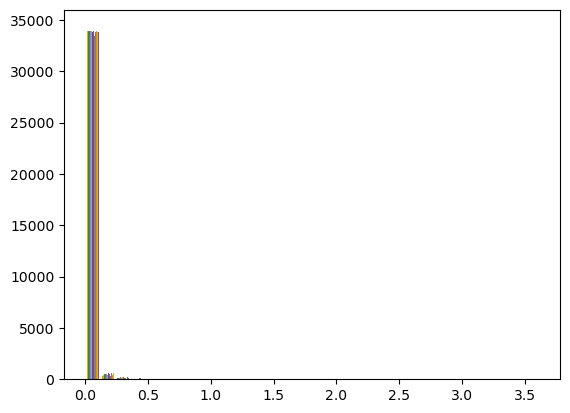

In [16]:
plt.hist(reshaped_precip, bins=30)

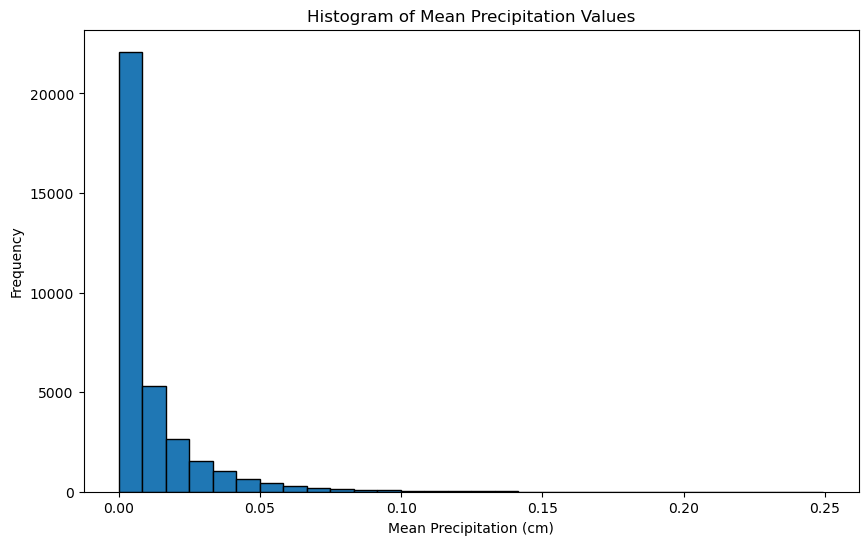

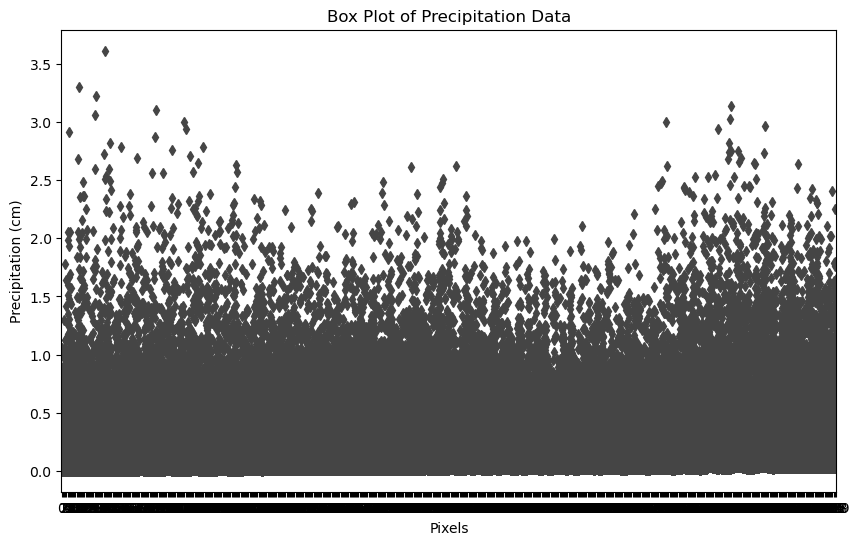

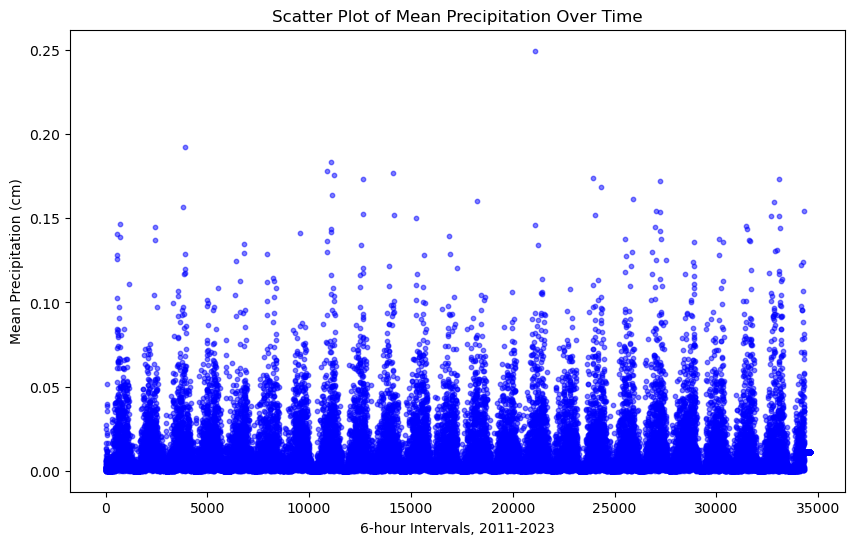

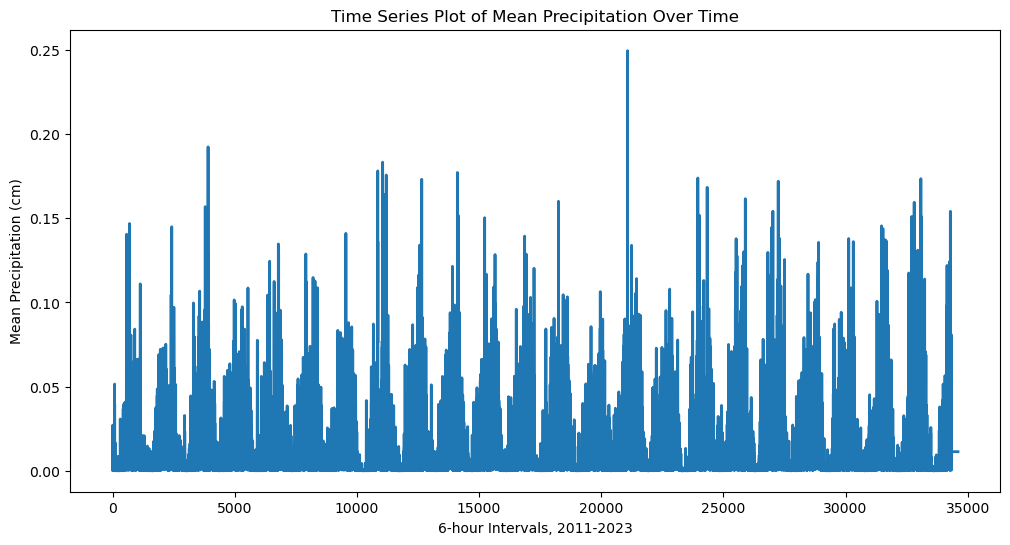

In [18]:
#Create histograms, box plots, scatter plots, and time series plots to visualize the distribution, relationships, and trends in your data.

# Create Histogram
plt.figure(figsize=(10, 6))
plt.hist(mean_values, bins=30, edgecolor='black')
plt.title('Histogram of Mean Precipitation Values')
plt.xlabel('Mean Precipitation (cm)')
plt.ylabel('Frequency')
plt.show()
#plt.savefig('Histogram of Mean Rainfall Values.png')

# Create Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=reshaped_precip)
plt.title('Box Plot of Precipitation Data')
plt.xlabel('Pixels')
plt.ylabel('Precipitation (cm)')
plt.show()
#plt.savefig('Box Plot of Rainfall Data.png')

# Create Scatter Plot
plt.figure(figsize=(10, 6))
x = np.arange(len(precip_arr))  # time
y = mean_values
plt.scatter(x, y, s=10, c='blue', alpha=0.5)
plt.title('Scatter Plot of Mean Precipitation Over Time')
plt.xlabel('6-hour Intervals, 2011-2023')
plt.ylabel('Mean Precipitation (cm)')
plt.show()
#plt.savefig('Scatter Plot of Mean Rainfall Over Time.png')

# Create Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(mean_values, linewidth=2)
plt.title('Time Series Plot of Mean Precipitation Over Time')
plt.xlabel('6-hour Intervals, 2011-2023')
plt.ylabel('Mean Precipitation (cm)')
plt.show()
#plt.savefig('Time Series Plot of Mean Rainfall Over Time.png')

(23876760,)


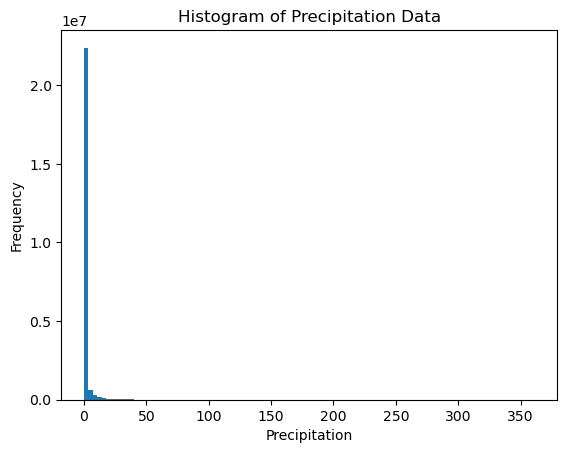

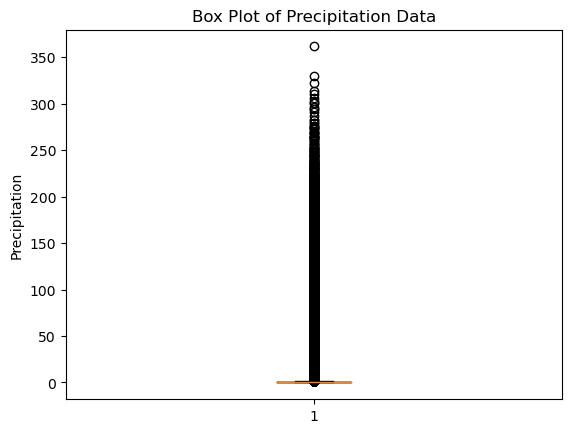

(383421,)
(3853283,)


In [22]:
# Outlier detection
flattened_data = precip_arr.reshape(-1) * 100
print(flattened_data.shape)
plt.hist(flattened_data, bins=100)
plt.xlabel('Precipitation')
plt.ylabel('Frequency')
plt.title('Histogram of Precipitation Data')
plt.show()

# Create a box plot
plt.boxplot(flattened_data)
plt.ylabel('Precipitation')
plt.title('Box Plot of Precipitation Data')
plt.show()

z_scores = np.abs(stats.zscore(flattened_data))
threshold = 3  # Adjust as needed
outliers = flattened_data[np.where(z_scores > threshold)]
print(outliers.shape)
Q1 = np.percentile(flattened_data, 25)
Q3 = np.percentile(flattened_data, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = flattened_data[(flattened_data < lower_bound) | (flattened_data > upper_bound)]
print(outliers.shape)